In [1]:
pip install pymrmr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pymrmr: filename=pymrmr-0.1.11-cp310-cp310-linux_x86_64.whl size=390234 sha256=541467ce2d181a835255046cd1912bd01f5dec3da3bf6634efaf0fcb57c99749
  Stored in directory: /root/.cache/pip/wheels/46/ae/55/4a2479c5f0de7eb363fe970cb18e4a750e03e4e63b1b5c2005
Successfully built pymrmr


In [2]:
pip install skrebate

  Preparing metadata (setup.py) ... done
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29253 sha256=719d1603b6a7e392451a087ceaf01a0fd48243e7b22d0d1aa63c42f8e9c4bb15
  Stored in directory: /root/.cache/pip/wheels/dd/67/40/683074a684607162bd0e34dcf7ccdfcab5861c3b2a83286f3a
Successfully built skrebate


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import statsmodels.api as sm
from pymrmr import mRMR
from skrebate import ReliefF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
df=pd.read_csv(r'8000.csv')

In [5]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [6]:
df.info

<bound method DataFrame.info of      HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0              No  16.60     Yes              No     No               3   
1              No  20.34      No              No    Yes               0   
2              No  26.58     Yes              No     No              20   
3              No  24.21      No              No     No               0   
4              No  23.71      No              No     No              28   
...           ...    ...     ...             ...    ...             ...   
7995           No  25.40     Yes              No     No               0   
7996           No  23.91      No              No    Yes              15   
7997           No  20.60     Yes              No     No               2   
7998           No  21.09     Yes              No     No              30   
7999           No  28.48      No              No     No               0   

      MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0               30          No  Female        55-59  White      Yes   
1                0          No  Female  80 or older  White       No   
2               30          No    Male        65-69  White      Yes   
3                0          No  Female        75-79  White       No   
4                0         Yes  Female        40-44  White       No   
...            ...         ...     ...          ...    ...      ...   
7995             0          No    Male  80 or older  White       No   
7996            15         Yes  Female  80 or older  White       No   
7997             0         Yes  Female  80 or older  White       No   
7998             0         Yes  Female  80 or older  White       No   
7999             0          No    Male        45-49  White       No   

     PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                 Yes  Very good          5    Yes            No        Yes  
1                 Yes  Very good          7     No            No         No  
2                 Yes       Fair          8    Yes            No         No  
3                  No       Good          6     No            No        Yes  
4                 Yes  Very good          8     No            No         No  
...               ...        ...        ...    ...           ...        ...  
7995              Yes  Very good          7     No            No        Yes  
7996              Yes       Poor          8     No           Yes         No  
7997              Yes  Very good          9    Yes            No        Yes  
7998              Yes  Very good          8     No            No         No  
7999              Yes  Very good          6     No            No         No  

[8000 rows x 18 columns]>

In [7]:
df.isnull().sum()

HeartDisease          0
BMI                   0
Smoking               0
AlcoholDrinking       0
Stroke                0
PhysicalHealth        0
MentalHealth          0
DiffWalking           0
Sex                   0
AgeCategory           0
Race                  0
Diabetic            176
PhysicalActivity      0
GenHealth             0
SleepTime             0
Asthma                0
KidneyDisease         0
SkinCancer            0
dtype: int64

In [8]:
df1 = df.dropna()

In [9]:
df1.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth        int64
MentalHealth          int64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime             int64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [10]:
df1.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [11]:
df1['HeartDisease'].value_counts()

No     7086
Yes     738
Name: HeartDisease, dtype: int64

array([[<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'PhysicalHealth'}>],
       [<Axes: title={'center': 'MentalHealth'}>,
        <Axes: title={'center': 'SleepTime'}>]], dtype=object)

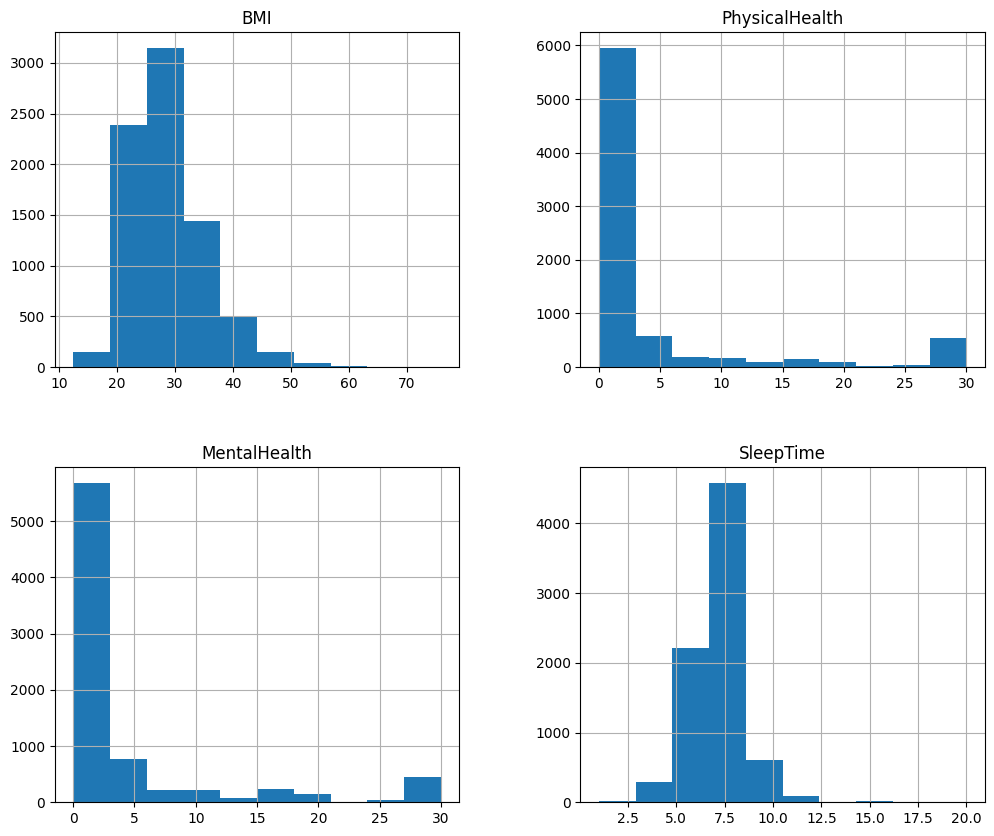

In [12]:
df1.hist(figsize=(12, 10))

In [13]:
correlation_matrix = df1.corr()

<ipython-input-13-6a30502d3456>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


<Axes: >

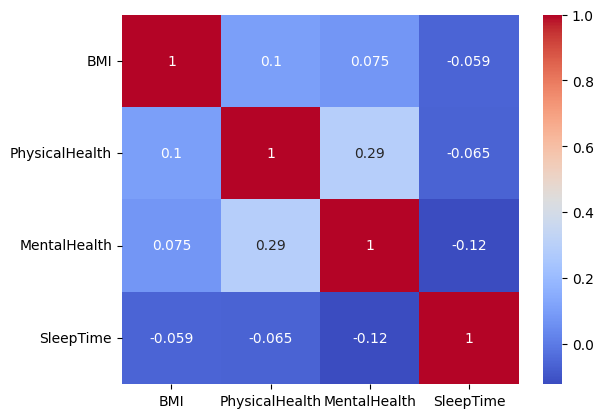

In [14]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

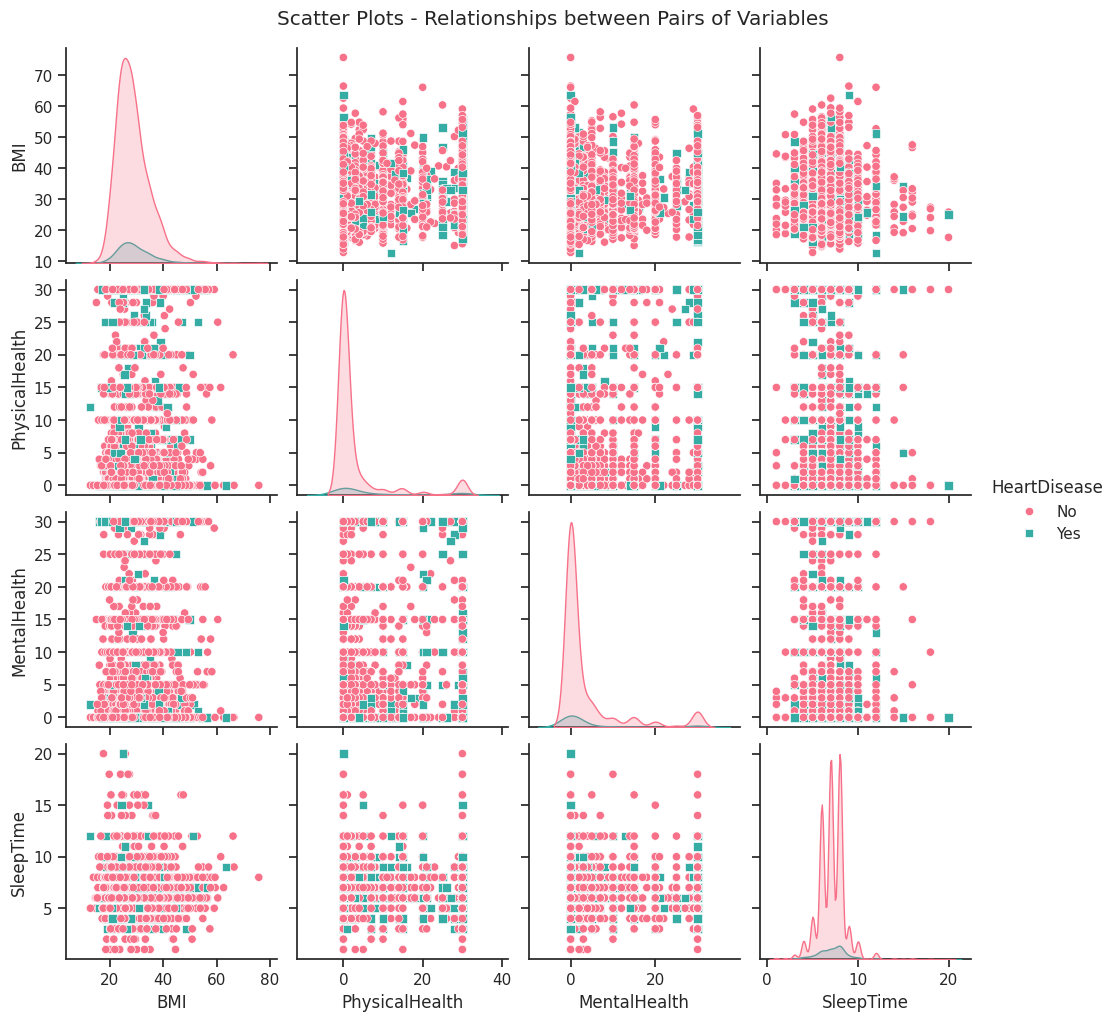

In [15]:
sns.set(style="ticks")
scatter_plot = sns.pairplot(df1, hue='HeartDisease', markers=["o", "s"], palette="husl", diag_kind="kde")
plt.suptitle('Scatter Plots - Relationships between Pairs of Variables', y=1.02)
plt.show()

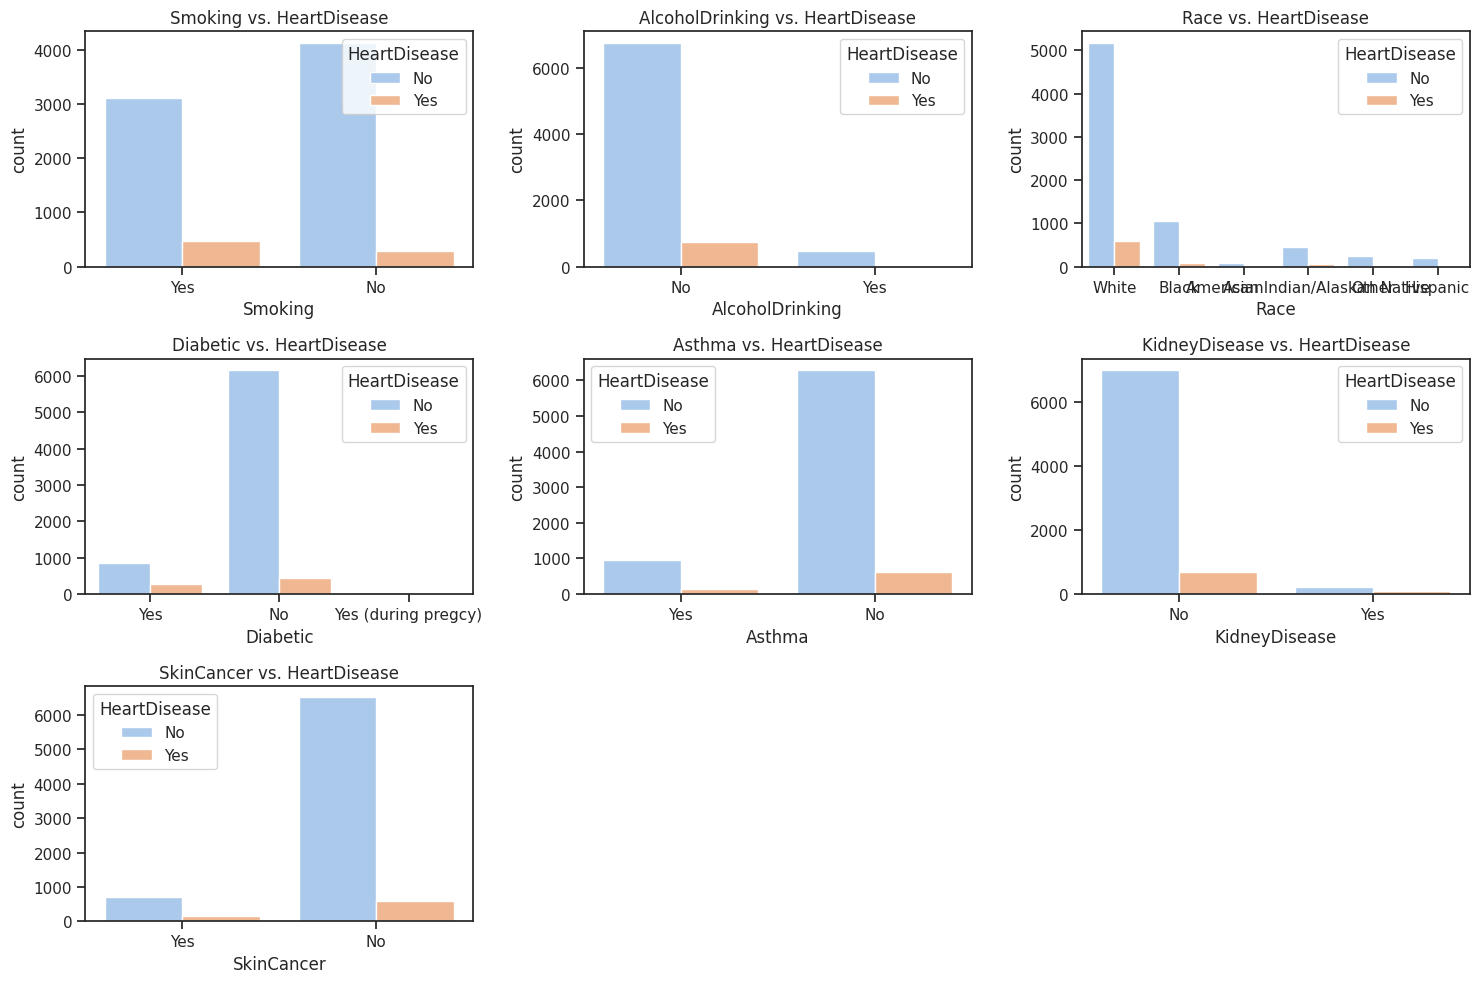

In [16]:
categorical_columns = ['Smoking', 'AlcoholDrinking', 'Race', 'Diabetic', 'Asthma', 'KidneyDisease', 'SkinCancer']

plt.figure(figsize=(15, 10))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=column, hue='HeartDisease', data=df, palette='pastel')
    plt.title(f'{column} vs. HeartDisease')

plt.tight_layout()
plt.show()

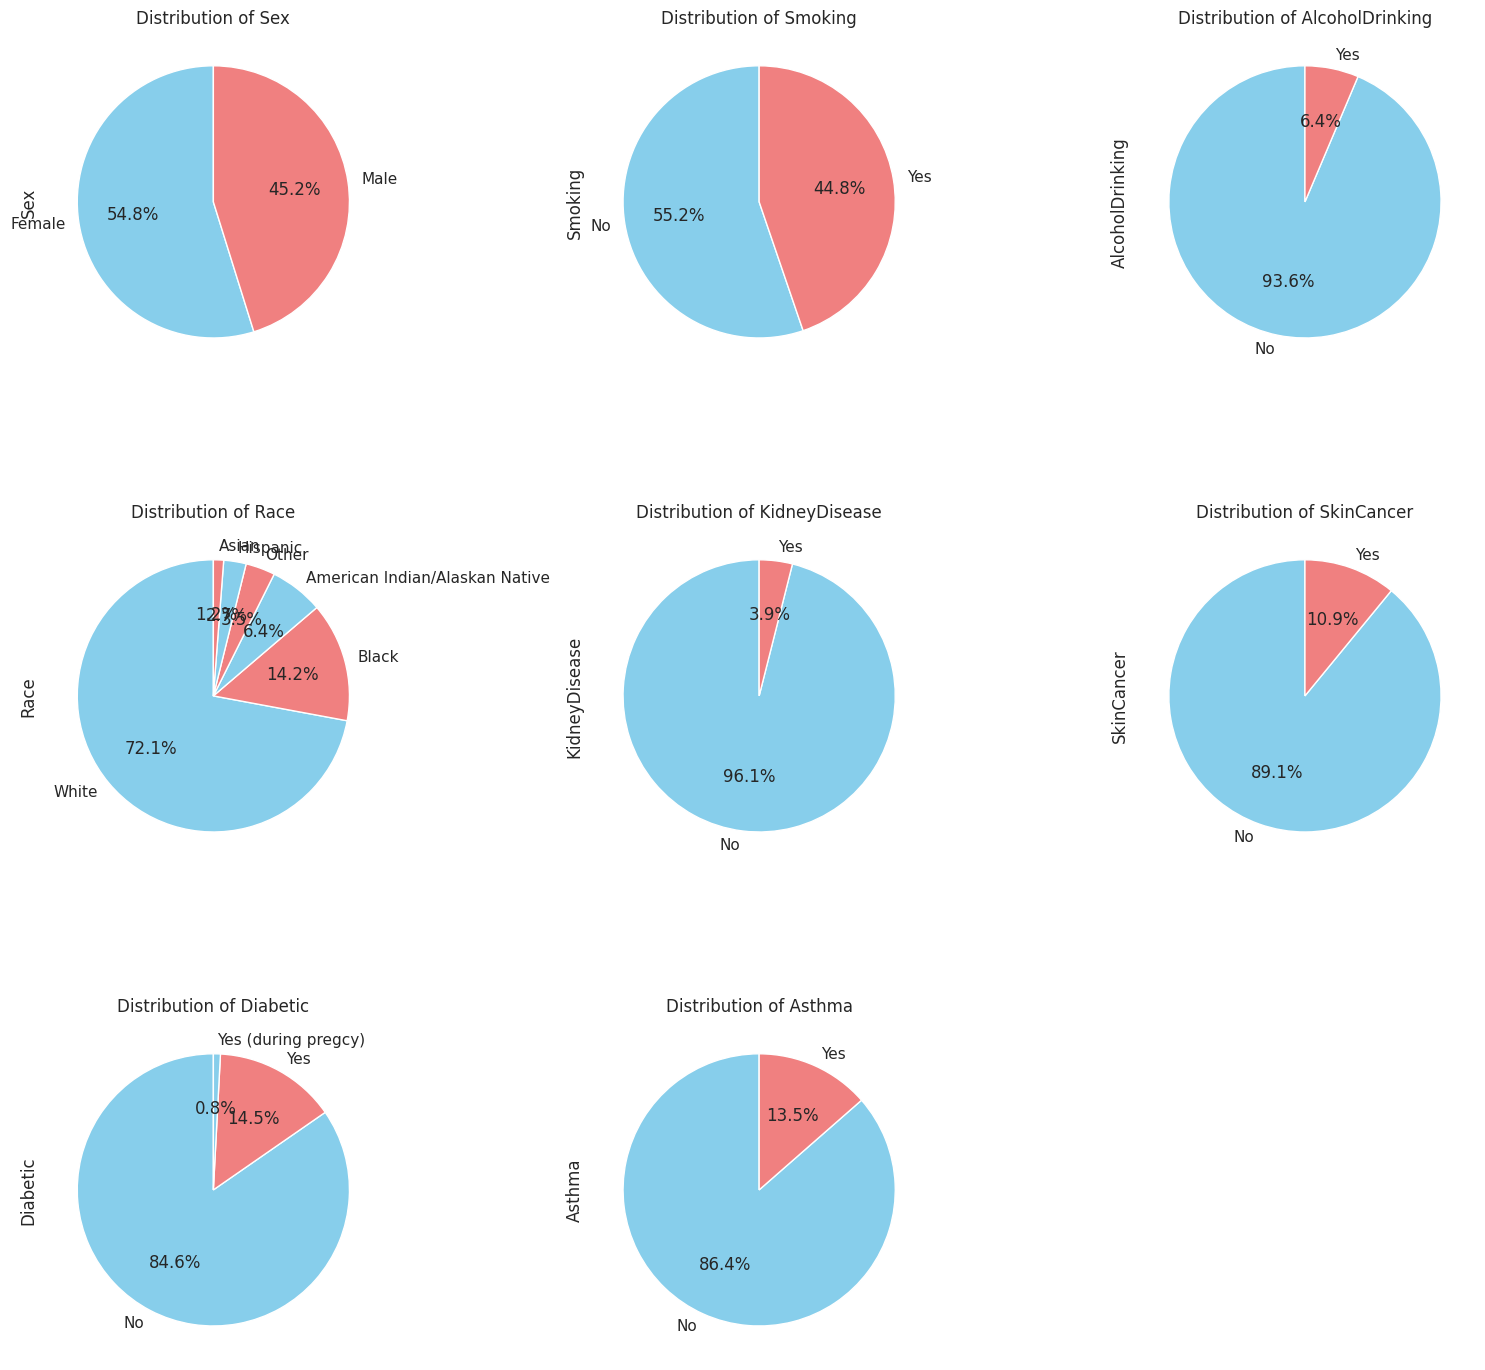

In [17]:
import matplotlib.pyplot as plt

categorical_columns = ['Sex', 'Smoking', 'AlcoholDrinking', 'Race', 'KidneyDisease', 'SkinCancer', 'Diabetic', 'Asthma']
num_columns = 3
num_rows = (len(categorical_columns) + num_columns - 1) // num_columns

plt.figure(figsize=(15, 5 * num_rows))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


<ipython-input-18-eccd1d1a2eaa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_column, y=continuous_column, data=df, palette='Set3')


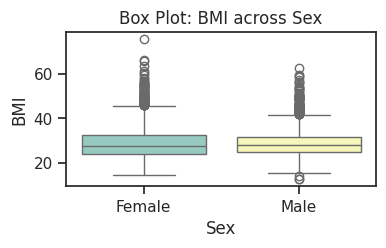

<ipython-input-18-eccd1d1a2eaa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_column, y=continuous_column, data=df, palette='Set3')


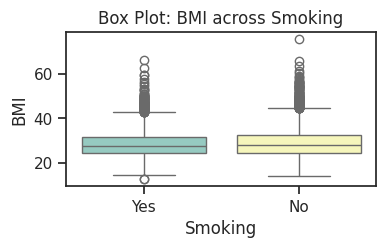

<ipython-input-18-eccd1d1a2eaa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_column, y=continuous_column, data=df, palette='Set3')


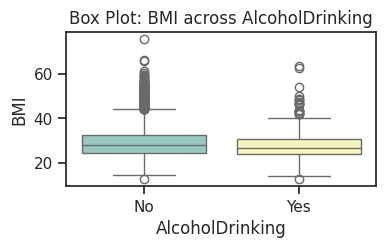

<ipython-input-18-eccd1d1a2eaa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_column, y=continuous_column, data=df, palette='Set3')


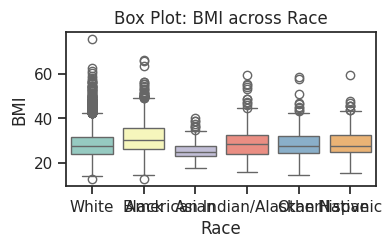

<ipython-input-18-eccd1d1a2eaa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_column, y=continuous_column, data=df, palette='Set3')


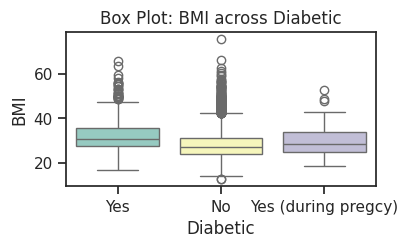

<ipython-input-18-eccd1d1a2eaa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_column, y=continuous_column, data=df, palette='Set3')


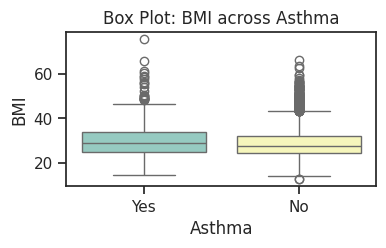

<ipython-input-18-eccd1d1a2eaa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_column, y=continuous_column, data=df, palette='Set3')


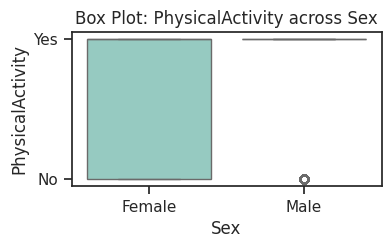

<ipython-input-18-eccd1d1a2eaa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_column, y=continuous_column, data=df, palette='Set3')


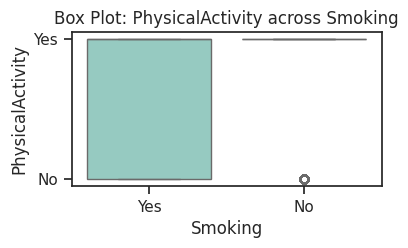

<ipython-input-18-eccd1d1a2eaa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_column, y=continuous_column, data=df, palette='Set3')


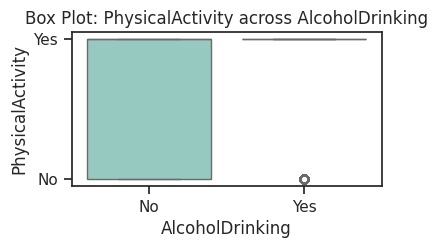

<ipython-input-18-eccd1d1a2eaa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_column, y=continuous_column, data=df, palette='Set3')


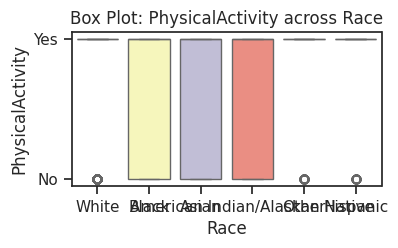

<ipython-input-18-eccd1d1a2eaa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_column, y=continuous_column, data=df, palette='Set3')


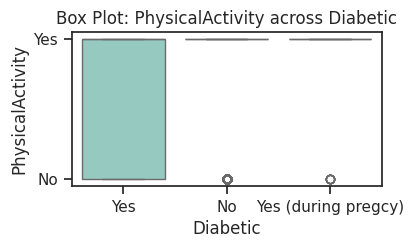

<ipython-input-18-eccd1d1a2eaa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_column, y=continuous_column, data=df, palette='Set3')


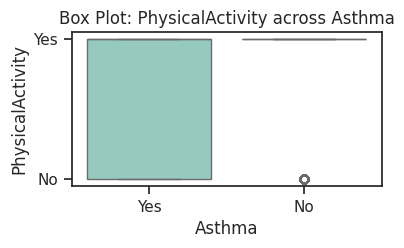

<ipython-input-18-eccd1d1a2eaa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_column, y=continuous_column, data=df, palette='Set3')


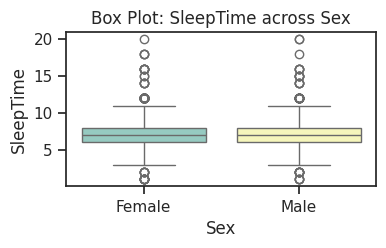

<ipython-input-18-eccd1d1a2eaa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_column, y=continuous_column, data=df, palette='Set3')


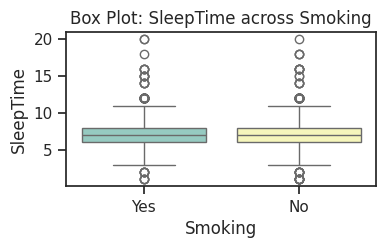

<ipython-input-18-eccd1d1a2eaa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_column, y=continuous_column, data=df, palette='Set3')


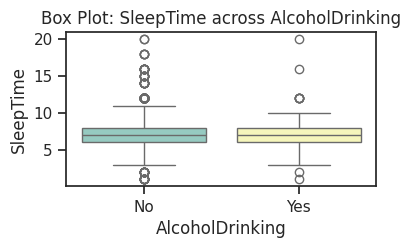

<ipython-input-18-eccd1d1a2eaa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_column, y=continuous_column, data=df, palette='Set3')


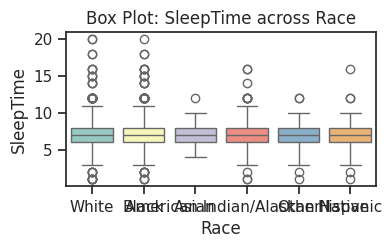

<ipython-input-18-eccd1d1a2eaa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_column, y=continuous_column, data=df, palette='Set3')


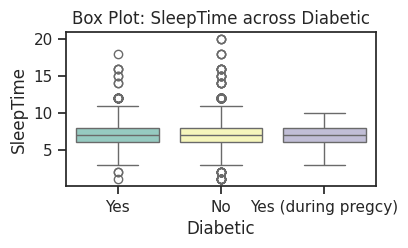

<ipython-input-18-eccd1d1a2eaa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_column, y=continuous_column, data=df, palette='Set3')


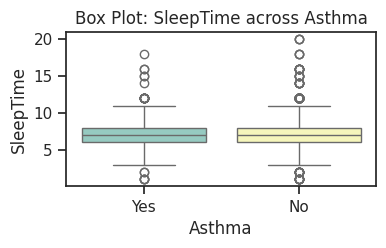

In [18]:
continuous_columns = ['BMI', 'PhysicalActivity', 'SleepTime']
categorical_columns = ['Sex', 'Smoking', 'AlcoholDrinking', 'Race', 'Diabetic', 'Asthma']

for continuous_column in continuous_columns:
    for categorical_column in categorical_columns:
        plt.figure(figsize=(4, 2))
        sns.boxplot(x=categorical_column, y=continuous_column, data=df, palette='Set3')
        plt.title(f'Box Plot: {continuous_column} across {categorical_column}')
        plt.show()

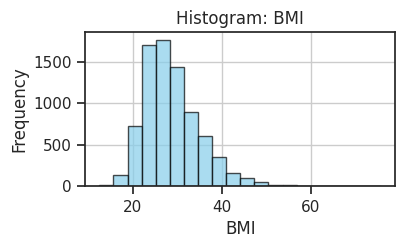

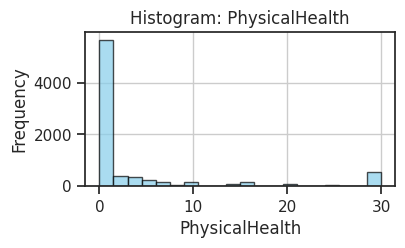

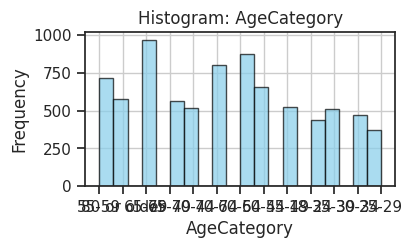

In [19]:
continuous_columns = ['BMI', 'PhysicalHealth', 'AgeCategory']
for continuous_column in continuous_columns:
    plt.figure(figsize=(4, 2))
    df[continuous_column].hist(bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram: {continuous_column}')
    plt.xlabel(continuous_column)
    plt.ylabel('Frequency')
    plt.show()

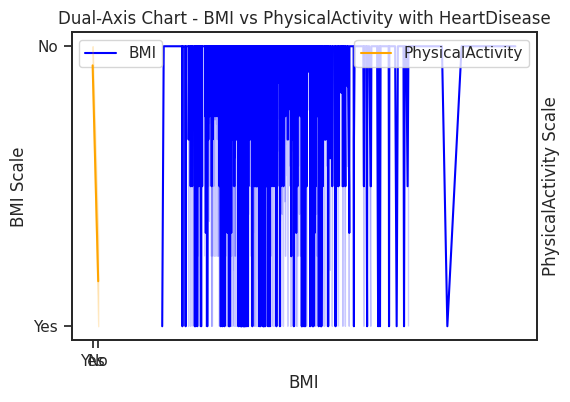

<ipython-input-20-dc9ca114ef09>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax1 = sns.barplot(data=df, x='AgeCategory', y='HeartDisease', color='green', ci=None)


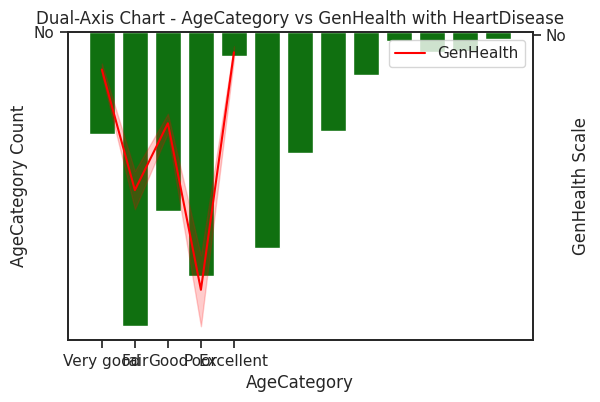

In [20]:
plt.figure(figsize=(6, 4))
ax1 = sns.lineplot(data=df, x='BMI', y='HeartDisease', label='BMI', color='blue')
ax2 = plt.twinx()
sns.lineplot(data=df, x='PhysicalActivity', y='HeartDisease', label='PhysicalActivity', ax=ax2, color='orange')
ax1.set_ylabel('BMI Scale')
ax2.set_ylabel('PhysicalActivity Scale')
plt.title('Dual-Axis Chart - BMI vs PhysicalActivity with HeartDisease')
plt.show()

plt.figure(figsize=(6, 4))
ax1 = sns.barplot(data=df, x='AgeCategory', y='HeartDisease', color='green', ci=None)
ax2 = plt.twinx()
sns.lineplot(data=df, x='GenHealth', y='HeartDisease', label='GenHealth', ax=ax2, color='red')
ax1.set_ylabel('AgeCategory Count')
ax2.set_ylabel('GenHealth Scale')
plt.title('Dual-Axis Chart - AgeCategory vs GenHealth with HeartDisease')
plt.show()

In [21]:
pip install dash pandas plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 15.8 MB/s eta 0:00:00


In [22]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

features = ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
            'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race',
            'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
            'Asthma', 'KidneyDisease', 'SkinCancer']
target = 'HeartDisease'

scatter_fig = px.scatter(df, x='BMI', y='PhysicalActivity', color=target, title='Scatter Plot', height=300, width=400)
bar_fig = px.bar(df, x='Smoking', color=target, title='Bar Chart', height=300, width=400)
box_fig = px.box(df, x='AgeCategory', y='SleepTime', color=target, title='Box Plot', height=300, width=400)
line_fig = px.line(df, x='AgeCategory', y='PhysicalActivity', title='Line Chart - PhysicalActivity Trends', height=300, width=400)

dashboard = html.Div([
    html.H1("Interactive Dashboard"),
    dcc.Graph(figure=scatter_fig),
    dcc.Graph(figure=bar_fig),
    dcc.Graph(figure=box_fig),
    dcc.Graph(figure=line_fig),
])

app = dash.Dash(__name__)
app.layout = dashboard

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

Models

In [23]:
features = df1[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
                 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race',
                 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
                 'Asthma', 'KidneyDisease', 'SkinCancer']]
target = df1['HeartDisease']

In [24]:
label_encoder = LabelEncoder()
for column in features.columns:
    if df1[column].dtype == 'object':
        features[column] = label_encoder.fit_transform(df1[column])

label_encoder_target = LabelEncoder()
target = label_encoder_target.fit_transform(target)

<ipython-input-24-f08dd5f3c643>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-24-f08dd5f3c643>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-24-f08dd5f3c643>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-24-f08dd5f

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LASSO

In [27]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_scaled, y_train)
selected_features = features.columns[lasso_model.coef_ != 0]
print("Selected Features:", selected_features)

Selected Features: Index(['Smoking', 'Stroke', 'PhysicalHealth', 'DiffWalking', 'Sex',
       'AgeCategory', 'Diabetic', 'PhysicalActivity', 'KidneyDisease'],
      dtype='object')


In [28]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

Random Forest

In [29]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred = rf_model.predict(X_test_selected)

Accuracy: 0.9022364217252397
Mean Squared Error (MSE): 0.0978
Mean Absolute Error (MAE): 0.0978
Root Mean Squared Error (RMSE): 0.3127


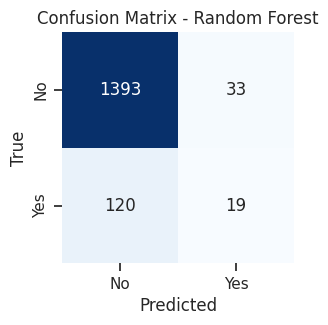

In [31]:
accuracy1_1 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy1_1)


from sklearn.metrics import mean_squared_error, mean_absolute_error
mse1_1 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse1_1:.4f}')
mae1_1 = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae1_1:.4f}')
rmse1_1 = np.sqrt(mse1_1)
print(f'Root Mean Squared Error (RMSE): {rmse1_1:.4f}')


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

KNN

In [32]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_selected, y_train)

KNeighborsClassifier()

In [33]:
y_pred = knn_model.predict(X_test_selected)

Accuracy: 0.9067092651757188
Mean Squared Error (MSE): 0.0933
Mean Absolute Error (MAE): 0.0933
Root Mean Squared Error (RMSE): 0.3054


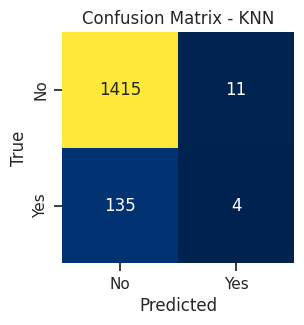

In [34]:
accuracy1_2 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy1_2)

mse1_2 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse1_2:.4f}')
mae1_2 = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae1_2:.4f}')
rmse1_2 = np.sqrt(mse1_2)
print(f'Root Mean Squared Error (RMSE): {rmse1_2:.4f}')


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Logistic Regression

In [35]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_selected, y_train)

LogisticRegression()

In [36]:
y_pred = logistic_model.predict(X_test_selected)

Accuracy: 0.9111821086261981
Mean Squared Error (MSE): 0.0888
Mean Absolute Error (MAE): 0.0888
Root Mean Squared Error (RMSE): 0.2980


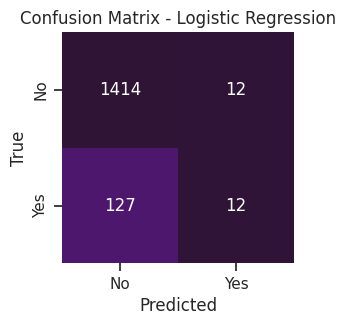

In [37]:
accuracy1_3 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy1_3)


mse1_3 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse1_3:.4f}')
mae1_3 = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae1_3:.4f}')
rmse1_3 = np.sqrt(mse1_3)
print(f'Root Mean Squared Error (RMSE): {rmse1_3:.4f}')


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='twilight_shifted', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Decision Tree

In [38]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_selected, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
y_pred = decision_tree_model.predict(X_test_selected)

Accuracy: 0.888817891373802
Mean Squared Error (MSE): 0.1112
Mean Absolute Error (MAE): 0.1112
Root Mean Squared Error (RMSE): 0.3334


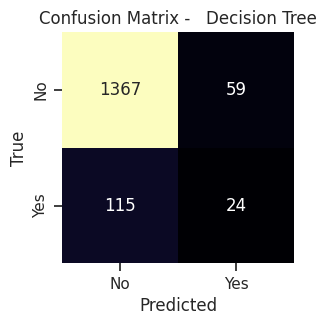

In [40]:
accuracy1_4 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy1_4)

mse1_4 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse1_4:.4f}')
mae1_4 = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae1_4:.4f}')
rmse1_4 = np.sqrt(mse1_4)
print(f'Root Mean Squared Error (RMSE): {rmse1_4:.4f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix -   Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Accuracy: 0.9125
Mean Squared Error (MSE): 0.1112
Mean Absolute Error (MAE): 0.1112
Root Mean Squared Error (RMSE): 0.3334


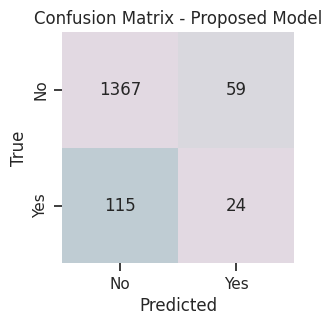

In [41]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
base_models = [
    ('logistic_regression', LogisticRegression(random_state=42)),
    ('knn', KNeighborsClassifier())
]
meta_model = BaggingClassifier(base_estimator=LogisticRegression(random_state=42), n_estimators=10, random_state=42)
stacking_model_bagging = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_model_bagging.fit(X_train_selected, y_train)
y_pred_bagging = stacking_model_bagging.predict(X_test_selected)
accuracy1_5 = accuracy_score(y_test, y_pred_bagging)
print(f'Accuracy: {accuracy1_5:.4f}')

mse1_5 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse1_5:.4f}')
mae1_5 = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae1_5:.4f}')
rmse1_5 = np.sqrt(mse1_5)
print(f'Root Mean Squared Error (RMSE): {rmse1_5:.4f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='twilight', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Proposed Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


LLBFS

In [42]:
num_features_to_select = 7
llbfs_selector = SelectKBest(score_func=mutual_info_classif, k=num_features_to_select)
X_train_selected1 = llbfs_selector.fit_transform(X_train_scaled, y_train)
X_test_selected1 = llbfs_selector.transform(X_test_scaled)

In [43]:
selected_feature_indices = llbfs_selector.get_support(indices=True)
selected_features1 = features.columns[selected_feature_indices]
print("Selected Features:", selected_features1)

Selected Features: Index(['Stroke', 'PhysicalHealth', 'DiffWalking', 'AgeCategory', 'Diabetic',
       'GenHealth', 'KidneyDisease'],
      dtype='object')


In [44]:
X_train_selected1 = X_train[selected_features1]
X_test_selected1 = X_test[selected_features1]

Random Forest

In [45]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected1, y_train)

RandomForestClassifier(random_state=42)

In [46]:
y_pred = rf_model.predict(X_test_selected1)

Accuracy: 0.8990415335463259
Mean Squared Error (MSE): 0.1010
Mean Absolute Error (MAE): 0.1010
Root Mean Squared Error (RMSE): 0.3177


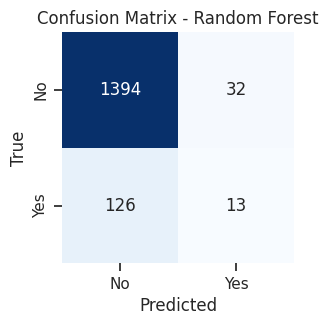

In [47]:
accuracy2_1 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy2_1)

mse2_1 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse2_1:.4f}')
mae2_1 = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae2_1:.4f}')
rmse2_1 = np.sqrt(mse2_1)
print(f'Root Mean Squared Error (RMSE): {rmse2_1:.4f}')


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

KNN

In [48]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_selected1, y_train)

KNeighborsClassifier()

In [49]:
y_pred = knn_model.predict(X_test_selected1)

Accuracy: 0.9054313099041533
Mean Squared Error (MSE): 0.0946
Mean Absolute Error (MAE): 0.0946
Root Mean Squared Error (RMSE): 0.3075


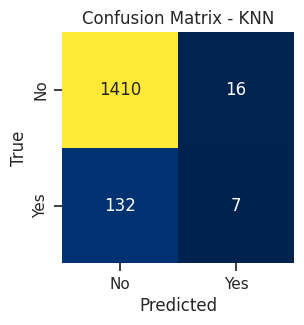

In [50]:
accuracy2_2 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy2_2)

mse2_2 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse2_2:.4f}')
mae2_2 = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae2_2:.4f}')
rmse2_2 = np.sqrt(mse2_2)
print(f'Root Mean Squared Error (RMSE): {rmse2_2:.4f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Logistic Regression

In [51]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_selected1, y_train)

LogisticRegression()

In [52]:
y_pred = logistic_model.predict(X_test_selected1)

Accuracy: 0.9124600638977636
Mean Squared Error (MSE): 0.0875
Mean Absolute Error (MAE): 0.0875
Root Mean Squared Error (RMSE): 0.2959


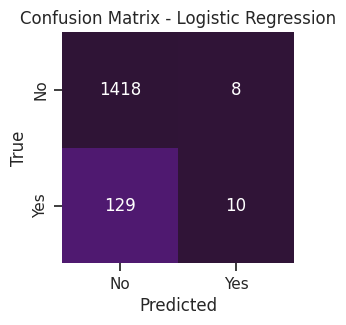

In [53]:
accuracy2_3 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy2_3)

mse2_3 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse2_3:.4f}')
mae2_3 = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae2_3:.4f}')
rmse2_3 = np.sqrt(mse2_3)
print(f'Root Mean Squared Error (RMSE): {rmse2_3:.4f}')


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='twilight_shifted', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Decision Tree

In [54]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_selected1, y_train)

DecisionTreeClassifier(random_state=42)

In [55]:
y_pred = decision_tree_model.predict(X_test_selected1)

Accuracy: 0.8939297124600639
Mean Squared Error (MSE): 0.1061
Mean Absolute Error (MAE): 0.1061
Root Mean Squared Error (RMSE): 0.3257


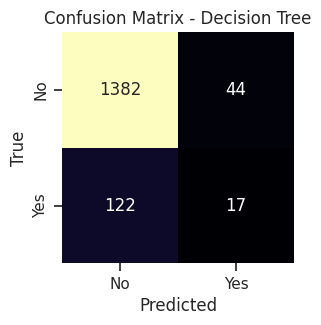

In [56]:
accuracy2_4 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy2_4)

mse2_4 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse2_4:.4f}')
mae2_4 = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae2_4:.4f}')
rmse2_4 = np.sqrt(mse2_4)
print(f'Root Mean Squared Error (RMSE): {rmse2_4:.4f}')


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Accuracy: 0.9137
Mean Squared Error (MSE): 0.1061
Mean Absolute Error (MAE): 0.1061
Root Mean Squared Error (RMSE): 0.3257


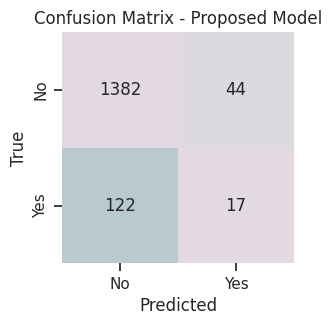

In [57]:
from sklearn.ensemble import BaggingClassifier
base_models = [
    ('logistic_regression', LogisticRegression(random_state=42)),
    ('knn', KNeighborsClassifier())
]
meta_model = BaggingClassifier(base_estimator=LogisticRegression(random_state=42), n_estimators=10, random_state=42)
stacking_model_bagging = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_model_bagging.fit(X_train_selected1, y_train)
y_pred_bagging = stacking_model_bagging.predict(X_test_selected1)
accuracy2_5 = accuracy_score(y_test, y_pred_bagging)
print(f'Accuracy: {accuracy2_5:.4f}')

mse2_5 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse2_5:.4f}')
mae2_5 = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae2_5:.4f}')
rmse2_5 = np.sqrt(mse2_5)
print(f'Root Mean Squared Error (RMSE): {rmse2_5:.4f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='twilight', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Proposed Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

ReliefF

In [58]:
relieff_selector = ReliefF()
X_train_selected2 = relieff_selector.fit_transform(X_train_scaled, y_train)
X_test_selected2 = relieff_selector.transform(X_test_scaled)

In [59]:
selected_features_indices1 = relieff_selector.top_features_
selected_feature_names1 = X_train.columns[selected_features_indices1]
print("Selected Features:")
print(selected_feature_names1)

Selected Features:
Index(['GenHealth', 'Sex', 'Smoking', 'AgeCategory', 'Race',
       'PhysicalActivity', 'Diabetic', 'SkinCancer', 'SleepTime', 'Asthma',
       'DiffWalking', 'BMI', 'PhysicalHealth', 'MentalHealth',
       'AlcoholDrinking', 'Stroke', 'KidneyDisease'],
      dtype='object')


Accuracy: 0.8939297124600639
Mean Squared Error (MSE): 0.1061
Mean Absolute Error (MAE): 0.1061
Root Mean Squared Error (RMSE): 0.3257


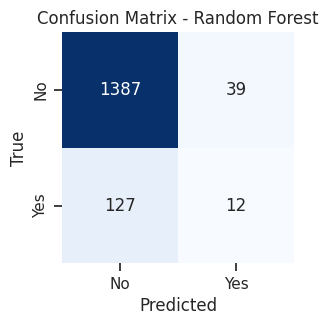

In [60]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected2, y_train)
y_pred = rf_model.predict(X_test_selected2)
accuracy3_1 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy3_1)

mse3_1 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse3_1:.4f}')
mae3_1 = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae3_1:.4f}')
rmse3_1 = np.sqrt(mse3_1)
print(f'Root Mean Squared Error (RMSE): {rmse3_1:.4f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy: 0.8958466453674121
Mean Squared Error (MSE): 0.1042
Mean Absolute Error (MAE): 0.1042
Root Mean Squared Error (RMSE): 0.3227


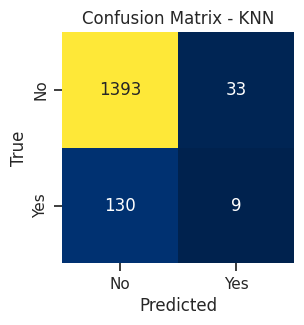

In [61]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_selected2, y_train)
y_pred = knn_model.predict(X_test_selected2)
accuracy3_2 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy3_2)

mse3_2 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse3_2:.4f}')
mae3_2 = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae3_2:.4f}')
rmse3_2 = np.sqrt(mse3_2)
print(f'Root Mean Squared Error (RMSE): {rmse3_2:.4f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy: 0.9118210862619809
Mean Squared Error (MSE): 0.0882
Mean Absolute Error (MAE): 0.0882
Root Mean Squared Error (RMSE): 0.2969


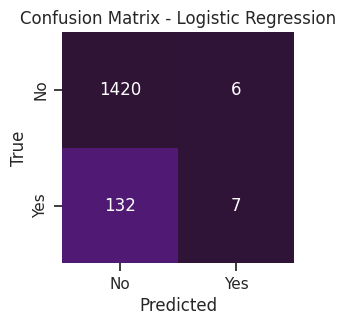

In [62]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_selected2, y_train)
y_pred = logistic_model.predict(X_test_selected2)
accuracy3_3 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy3_3)

mse3_3 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse3_3:.4f}')
mae3_3 = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae3_3:.4f}')
rmse3_3 = np.sqrt(mse3_3)
print(f'Root Mean Squared Error (RMSE): {rmse3_3:.4f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='twilight_shifted', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy: 0.8549520766773163
Mean Squared Error (MSE): 0.1450
Mean Absolute Error (MAE): 0.1450
Root Mean Squared Error (RMSE): 0.3809


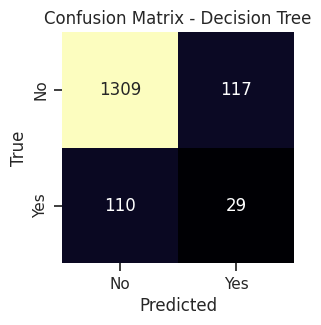

In [63]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_selected2, y_train)
y_pred = decision_tree_model.predict(X_test_selected2)
accuracy3_4 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy3_4)

mse3_4 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse3_4:.4f}')
mae3_4 = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae3_4:.4f}')
rmse3_4 = np.sqrt(mse3_4)
print(f'Root Mean Squared Error (RMSE): {rmse3_4:.4f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Accuracy: 0.9099
Mean Squared Error (MSE): 0.1450
Mean Absolute Error (MAE): 0.1450
Root Mean Squared Error (RMSE): 0.3809


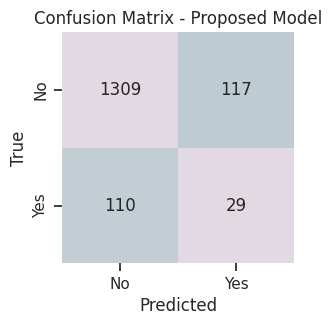

In [64]:
from sklearn.ensemble import BaggingClassifier
base_models = [
    ('logistic_regression', LogisticRegression(random_state=42)),
    ('knn', KNeighborsClassifier())
]
meta_model = BaggingClassifier(base_estimator=LogisticRegression(random_state=42), n_estimators=10, random_state=42)
stacking_model_bagging = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_model_bagging.fit(X_train_selected2, y_train)
y_pred_bagging = stacking_model_bagging.predict(X_test_selected2)
accuracy3_5 = accuracy_score(y_test, y_pred_bagging)
print(f'Accuracy: {accuracy3_5:.4f}')

mse3_5 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse3_5:.4f}')
mae3_5 = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae3_5:.4f}')
rmse3_5 = np.sqrt(mse3_5)
print(f'Root Mean Squared Error (RMSE): {rmse3_5:.4f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='twilight', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Proposed Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


mRMR


In [65]:
pip install mrmr_selection

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


In [66]:
import mrmr

from mrmr import mrmr_classif

In [67]:
import numpy as np
import pandas as pd
import pymrmr
np.random.seed(42)
data = pd.DataFrame({
    'BMI': np.random.rand(100),
    'Smoking': np.random.rand(100),
    'AlcoholDrinking': np.random.rand(100),
    'Stroke': np.random.rand(100),
    'PhysicalHealth': np.random.rand(100),
    'MentalHealth': np.random.rand(100),
    'DiffWalking': np.random.rand(100),
    'Sex': np.random.rand(100),
    'AgeCategory': np.random.rand(100),
    'Race': np.random.rand(100),
    'Diabetic': np.random.rand(100),
    'PhysicalActivity': np.random.rand(100),
    'GenHealth': np.random.rand(100),
    'SleepTime': np.random.rand(100),
    'Asthma': np.random.rand(100),
    'KidneyDisease': np.random.rand(100),
    'SkinCancer': np.random.rand(100),
    'Target': np.random.choice([0, 1], size=100)
})
X = data[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
          'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race',
          'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
          'Asthma', 'KidneyDisease', 'SkinCancer']].values
y = data['Target'].values
X = pd.DataFrame(X)
y = pd.Series(y)
from mrmr import mrmr_classif
selected_features_indices3= mrmr_classif(X=X, y=y, K=10)
selected_feature_names3 = data.columns[:-1][selected_features_indices3]
print("Selected Features:")
print(selected_feature_names3)


100%|██████████| 10/10 [00:00<00:00, 47.00it/s]

Selected Features:
Index(['BMI', 'DiffWalking', 'SleepTime', 'KidneyDisease', 'AlcoholDrinking',
       'Asthma', 'GenHealth', 'Sex', 'Diabetic', 'SkinCancer'],
      dtype='object')


In [68]:
X_train_selected3 = X_train[selected_feature_names3]
X_test_selected3 = X_test[selected_feature_names3]

Accuracy: 0.8824281150159744
Mean Squared Error (MSE): 0.1176
Mean Absolute Error (MAE): 0.1176
Root Mean Squared Error (RMSE): 0.3429


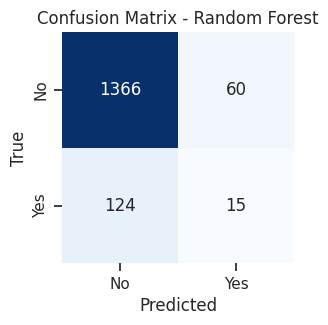

In [69]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected3, y_train)
y_pred = rf_model.predict(X_test_selected3)
accuracy4_1 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy4_1)

mse4_1 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse4_1:.4f}')
mae4_1 = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae4_1:.4f}')
rmse4_1 = np.sqrt(mse4_1)
print(f'Root Mean Squared Error (RMSE): {rmse4_1:.4f}')


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy: 0.9047923322683706
Mean Squared Error (MSE): 0.0952
Mean Absolute Error (MAE): 0.0952
Root Mean Squared Error (RMSE): 0.3086


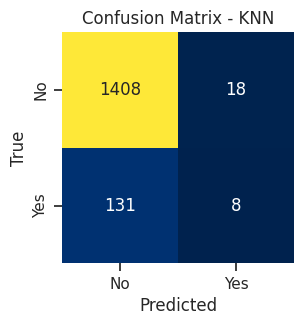

In [70]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_selected3, y_train)
y_pred = knn_model.predict(X_test_selected3)
accuracy4_2 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy4_2)

mse4_2 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse4_2:.4f}')
mae4_2 = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae4_2:.4f}')
rmse4_2 = np.sqrt(mse4_2)
print(f'Root Mean Squared Error (RMSE): {rmse4_2:.4f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy: 0.9105431309904153
Mean Squared Error (MSE): 0.0895
Mean Absolute Error (MAE): 0.0895
Root Mean Squared Error (RMSE): 0.2991


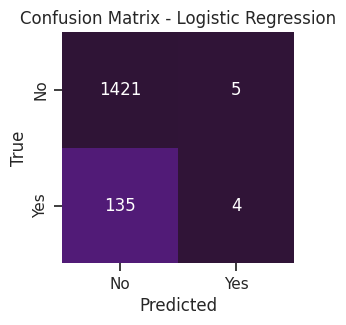

In [71]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_selected3, y_train)
y_pred = logistic_model.predict(X_test_selected3)
accuracy4_3 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy4_3)

mse4_3 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse4_3:.4f}')
mae4_3 = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae4_3:.4f}')
rmse4_3 = np.sqrt(mse4_3)
print(f'Root Mean Squared Error (RMSE): {rmse4_3:.4f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='twilight_shifted', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy: 0.8575079872204473
Mean Squared Error (MSE): 0.1425
Mean Absolute Error (MAE): 0.1425
Root Mean Squared Error (RMSE): 0.3775


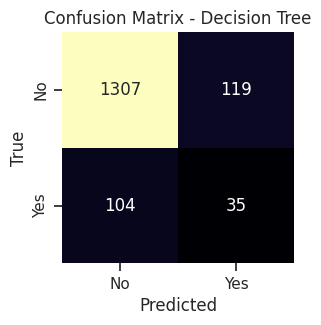

In [72]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_selected3, y_train)
y_pred = decision_tree_model.predict(X_test_selected3)
accuracy4_4 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy4_4)

mse4_4 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse4_4:.4f}')
mae4_4 = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae4_4:.4f}')
rmse4_4 = np.sqrt(mse4_4)
print(f'Root Mean Squared Error (RMSE): {rmse4_4:.4f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy: 0.9131
Mean Squared Error (MSE): 0.1425
Mean Absolute Error (MAE): 0.1425
Root Mean Squared Error (RMSE): 0.3775


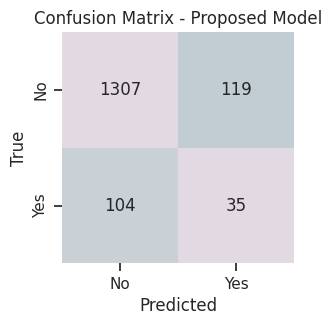

In [73]:
from sklearn.ensemble import BaggingClassifier
base_models = [
    ('logistic_regression', LogisticRegression(random_state=42)),
    ('knn', KNeighborsClassifier())
]
meta_model = BaggingClassifier(base_estimator=LogisticRegression(random_state=42), n_estimators=10, random_state=42)
stacking_model_bagging = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_model_bagging.fit(X_train_selected3, y_train)
y_pred_bagging = stacking_model_bagging.predict(X_test_selected3)
accuracy4_5 = accuracy_score(y_test, y_pred_bagging)
print(f'Accuracy: {accuracy4_5:.4f}')

mse4_5 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse4_5:.4f}')
mae4_5 = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae4_5:.4f}')
rmse4_5 = np.sqrt(mse4_5)
print(f'Root Mean Squared Error (RMSE): {rmse4_5:.4f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='twilight', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Proposed Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [74]:
accuracy_data = {
    'LASSO': {'Random Forest': accuracy1_1, 'KNN': accuracy1_2 , 'Logistic Regression':accuracy1_3,'Decision Tree': accuracy1_4,'Proposed Model':accuracy1_5},
    'LLBFS': {'Random Forest': accuracy2_1, 'KNN': accuracy2_2 , 'Logistic Regression':accuracy2_3,'Decision Tree': accuracy2_4,'Proposed Model':accuracy2_5},
    'Relief': {'Random Forest': accuracy3_1, 'KNN': accuracy3_2 , 'Logistic Regression':accuracy3_3,'Decision Tree': accuracy3_4,'Proposed Model':accuracy3_5},
    'mRMR': {'Random Forest': accuracy4_1, 'KNN': accuracy4_2 , 'Logistic Regression':accuracy4_3,'Decision Tree': accuracy4_4,'Proposed Model':accuracy4_5},
}
accuracy_df = pd.DataFrame(accuracy_data)
print(accuracy_df)

                        LASSO     LLBFS    Relief      mRMR
Random Forest        0.902236  0.899042  0.893930  0.882428
KNN                  0.906709  0.905431  0.895847  0.904792
Logistic Regression  0.911182  0.912460  0.911821  0.910543
Decision Tree        0.888818  0.893930  0.854952  0.857508
Proposed Model       0.912460  0.913738  0.909904  0.913099


In [75]:
max_accuracy_value = accuracy_df.stack().max()
max_accuracy_entries = []
for index, value in accuracy_df.stack().items():
    if value == max_accuracy_value:
        max_accuracy_entries.append(index)
for entry in max_accuracy_entries:
    model, feature_selection_name = entry
    print(f'Highest Accuracy: {max_accuracy_value:.4f}')
    print(f'Feature Selection Name: {feature_selection_name}')
    print(f'Model: {model}')
    print()


Highest Accuracy: 0.9137
Feature Selection Name: LLBFS
Model: Proposed Model



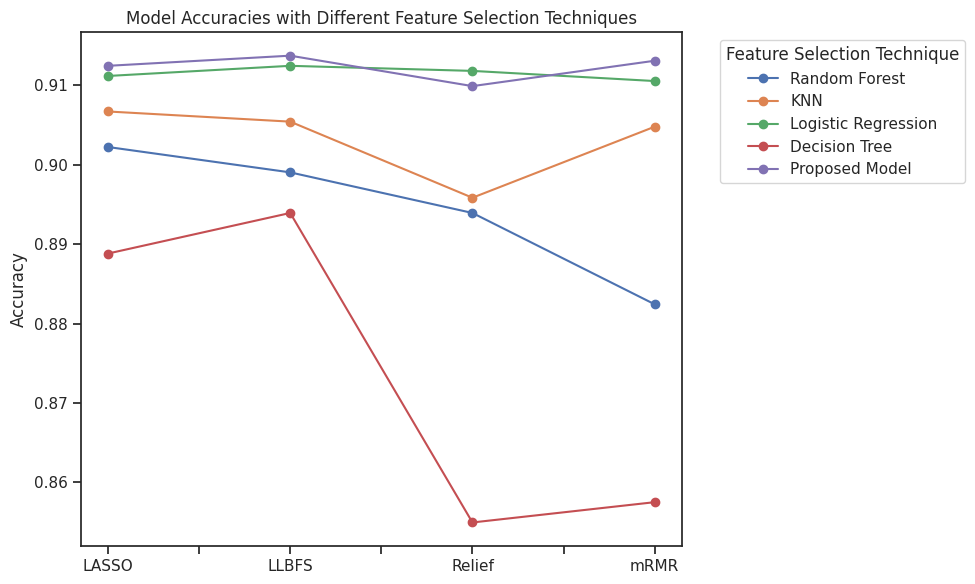

In [76]:
ax = accuracy_df.T.plot(kind='line', marker='o', figsize=(10, 6))
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracies with Different Feature Selection Techniques')
plt.legend(title='Feature Selection Technique', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [77]:
MSE_data = {
    'LASSO': {'Random Forest': mse1_1, 'KNN': mse1_2 , 'Logistic Regression':mse1_3,'Decision Tree': mse1_4,'Proposed Model':mse1_5},
    'LLBFS': {'Random Forest': mse2_1, 'KNN': mse2_2 , 'Logistic Regression':mse2_3,'Decision Tree': mse2_4,'Proposed Model':mse2_5},
    'Relief': {'Random Forest': mse3_1, 'KNN': mse3_2 , 'Logistic Regression':mse3_3,'Decision Tree': mse3_4,'Proposed Model':mse3_5},
    'mRMR': {'Random Forest': mse4_1, 'KNN': mse4_2 , 'Logistic Regression':mse4_3,'Decision Tree': mse4_4,'Proposed Model':mse4_5},
}
MSE_df = pd.DataFrame(MSE_data)
print(MSE_df)

                        LASSO     LLBFS    Relief      mRMR
Random Forest        0.097764  0.100958  0.106070  0.117572
KNN                  0.093291  0.094569  0.104153  0.095208
Logistic Regression  0.088818  0.087540  0.088179  0.089457
Decision Tree        0.111182  0.106070  0.145048  0.142492
Proposed Model       0.111182  0.106070  0.145048  0.142492


In [78]:
min_mse_value = MSE_df.stack().min()
min_mse_entries = []
for index, value in MSE_df.stack().items():
    if value == min_mse_value:
        min_mse_entries.append(index)
for entry in min_mse_entries:
    model, feature_selection_name = entry
    print(f'Minimum MSE: {min_mse_value:.4f}')
    print(f'Feature Selection Name: {feature_selection_name}')
    print(f'Model: {model}')
    print()


Minimum MSE: 0.0875
Feature Selection Name: LLBFS
Model: Logistic Regression



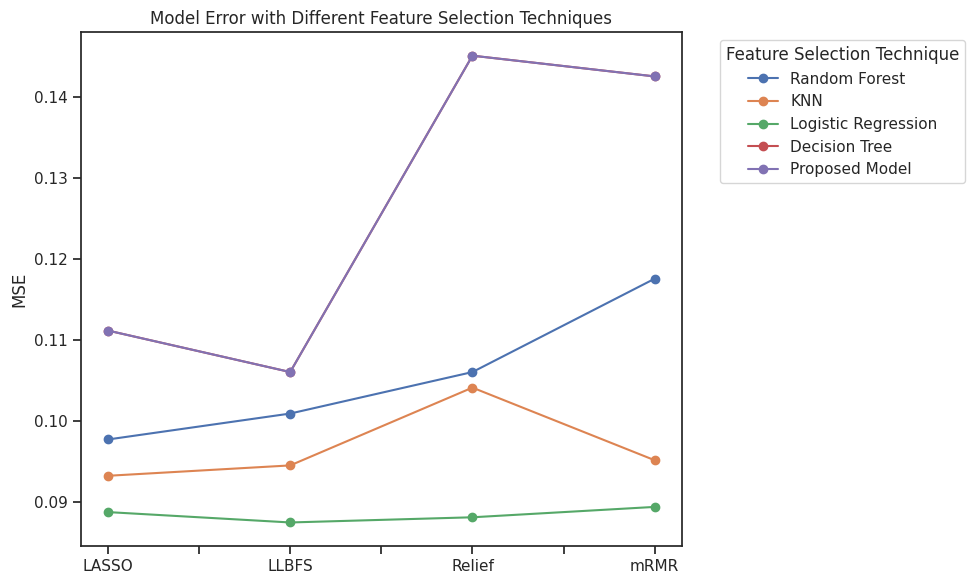

In [79]:
ax = MSE_df.T.plot(kind='line', marker='o', figsize=(10, 6))
ax.set_ylabel('MSE')
ax.set_title('Model Error with Different Feature Selection Techniques')
plt.legend(title='Feature Selection Technique', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [80]:
MAE_data = {
    'LASSO': {'Random Forest': mae1_1, 'KNN': mae1_2 , 'Logistic Regression':mae1_3,'Decision Tree': mae1_4,'Proposed Model':mae1_5},
    'LLBFS': {'Random Forest': mae2_1, 'KNN': mae2_2 , 'Logistic Regression':mae2_3,'Decision Tree': mae2_4,'Proposed Model':mae2_5},
    'Relief': {'Random Forest': mae3_1, 'KNN': mae3_2 , 'Logistic Regression':mae3_3,'Decision Tree': mae3_4,'Proposed Model':mae3_5},
    'mRMR': {'Random Forest': mae4_1, 'KNN': mae4_2 , 'Logistic Regression':mae4_3,'Decision Tree': mae4_4,'Proposed Model':mae4_5},
}
MAE_df = pd.DataFrame(MAE_data)
print(MAE_df)

                        LASSO     LLBFS    Relief      mRMR
Random Forest        0.097764  0.100958  0.106070  0.117572
KNN                  0.093291  0.094569  0.104153  0.095208
Logistic Regression  0.088818  0.087540  0.088179  0.089457
Decision Tree        0.111182  0.106070  0.145048  0.142492
Proposed Model       0.111182  0.106070  0.145048  0.142492


In [81]:
min_mae_value = MAE_df.stack().min()
min_mae_entries = []
for index, value in MAE_df.stack().items():
    if value == min_mae_value:
        min_mae_entries.append(index)
for entry in min_mae_entries:
    model, feature_selection_name = entry
    print(f'Minimum MAE: {min_mse_value:.4f}')
    print(f'Feature Selection Name: {feature_selection_name}')
    print(f'Model: {model}')
    print()


Minimum MAE: 0.0875
Feature Selection Name: LLBFS
Model: Logistic Regression



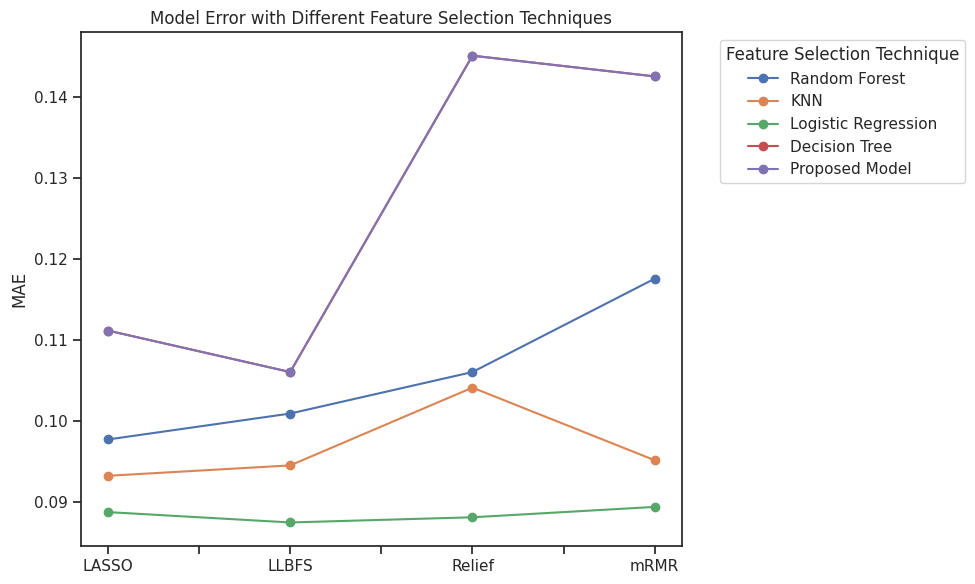

In [82]:
ax = MAE_df.T.plot(kind='line', marker='o', figsize=(10, 6))
ax.set_ylabel('MAE')
ax.set_title('Model Error with Different Feature Selection Techniques')
plt.legend(title='Feature Selection Technique', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [83]:
RMSE_data = {
    'LASSO': {'Random Forest': rmse1_1, 'KNN': rmse1_2 , 'Logistic Regression':rmse1_3,'Decision Tree': rmse1_4,'Proposed Model':rmse1_5},
    'LLBFS': {'Random Forest': rmse2_1, 'KNN': rmse2_2 , 'Logistic Regression':rmse2_3,'Decision Tree': rmse2_4,'Proposed Model':rmse2_5},
    'Relief': {'Random Forest': rmse3_1, 'KNN': rmse3_2 , 'Logistic Regression':rmse3_3,'Decision Tree': rmse3_4,'Proposed Model':rmse3_5},
    'mRMR': {'Random Forest': rmse4_1, 'KNN': rmse4_2 , 'Logistic Regression':rmse4_3,'Decision Tree': rmse4_4,'Proposed Model':rmse4_5},
}
RMSE_df = pd.DataFrame(RMSE_data)
print(RMSE_df)

                        LASSO     LLBFS    Relief      mRMR
Random Forest        0.312672  0.317740  0.325684  0.342888
KNN                  0.305435  0.307520  0.322728  0.308557
Logistic Regression  0.298023  0.295871  0.296949  0.299093
Decision Tree        0.333440  0.325684  0.380852  0.377481
Proposed Model       0.333440  0.325684  0.380852  0.377481


In [84]:
min_rmse_value = RMSE_df.stack().min()
min_rmse_entries = []
for index, value in RMSE_df.stack().items():
    if value == min_rmse_value:
        min_rmse_entries.append(index)
for entry in min_rmse_entries:
    model, feature_selection_name = entry
    print(f'Minimum RMSE: {min_rmse_value:.4f}')
    print(f'Feature Selection Name: {feature_selection_name}')
    print(f'Model: {model}')
    print()


Minimum RMSE: 0.2959
Feature Selection Name: LLBFS
Model: Logistic Regression



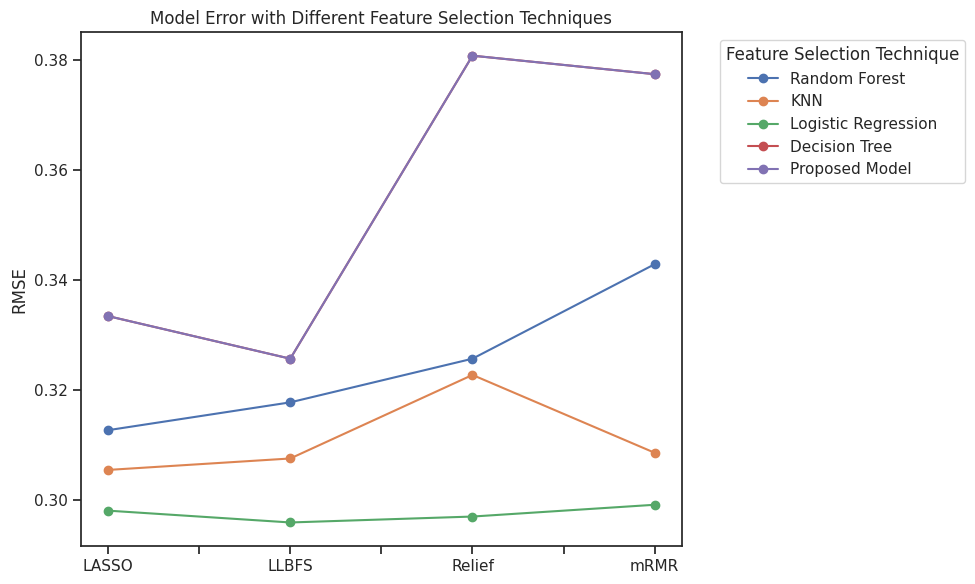

In [85]:
ax = RMSE_df.T.plot(kind='line', marker='o', figsize=(10, 6))
ax.set_ylabel('RMSE')
ax.set_title('Model Error with Different Feature Selection Techniques')
plt.legend(title='Feature Selection Technique', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()